In [29]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import root_mean_squared_error, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.preprocessing import LabelEncoder


In [30]:
df = pd.read_csv("../data/Crop_recommendation.csv")

In [31]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [32]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [33]:
len(df["label"].value_counts())

22

In [34]:
label_encoder = LabelEncoder()

# Fit and transform the data
df['label'] = label_encoder.fit_transform(df['label'])

In [35]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


In [36]:
df["label"].value_counts()

label
20    100
11    100
8     100
6     100
4     100
17    100
16    100
0     100
15    100
21    100
7     100
12    100
1     100
19    100
10    100
2     100
14    100
13    100
18    100
9     100
3     100
5     100
Name: count, dtype: int64

In [37]:
df_target = df["label"]
df_features = df.drop('label', axis=1)

In [38]:
correlation_matrix = df_features.corr()

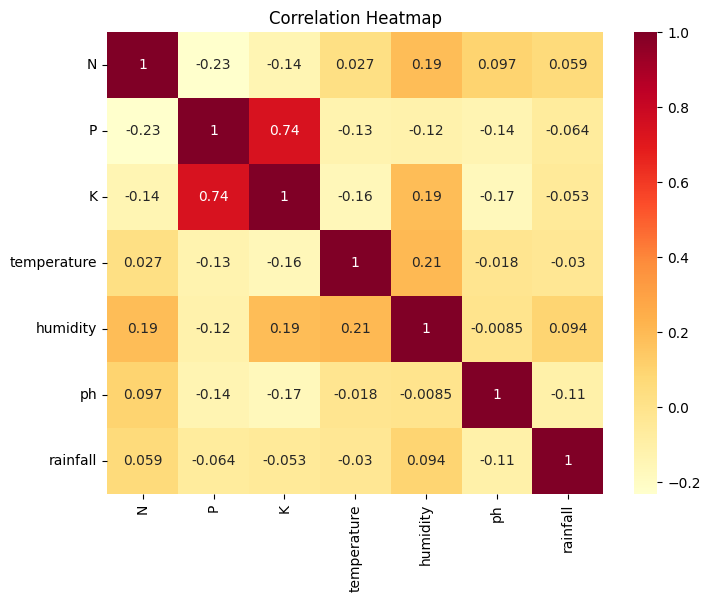

In [39]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd')
plt.title('Correlation Heatmap')
plt.show()

In [40]:
df_features.drop('P', axis=1, inplace=True)

In [41]:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df_features)

In [42]:
standardized_data = scaler.fit_transform(df_features)


In [46]:
type(standardized_data)

numpy.ndarray

In [43]:
standardized_df = pd.DataFrame(standardized_data, columns=df_features.columns)


In [44]:
standardized_df.head()

,N,K,temperature,humidity,ph,rainfall
0,1.068797,-0.101688,-0.935587,0.472666,0.043302,1.810361
1,0.933329,-0.141185,-0.759646,0.397051,0.734873,2.242058
2,0.255986,-0.081939,-0.515898,0.486954,1.771510,2.921066
3,0.635298,-0.160933,0.172807,0.389805,0.660308,2.537048
4,0.743673,-0.121436,-1.083647,0.454792,1.497868,2.898373


In [45]:
y = df_target.values

In [ ]:
def preprocess(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)

    label_encoder = LabelEncoder()

    # Fit and transform the data
    df['label'] = label_encoder.fit_transform(df['label'])
    
    return df